In [1]:
##USE synthetic_py3.8

##Libraries

#1. conda install -c pytorch -c conda-forge ctgan
#2. pip install sdv
#3. pip install table-evaluator

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("C:/Projects/Workspaces/Datasets/Structured/Food Demand/train.csv").sample(frac=1).reset_index(drop=True)
print(data.shape)
data.head()

(456548, 9)


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1185651,36,89,1062,161.05,182.36,0,0,904
1,1230608,8,68,2539,95.09,116.46,1,1,661
2,1304860,95,109,2577,290.03,290.03,0,0,163
3,1169001,80,50,1993,119.31,119.31,0,1,904
4,1436779,69,51,1216,408.43,406.43,0,0,67


In [ ]:
# When using the CTGAN library directly, you may need to manually preprocess your data into the correct format, for example:

# Continuous data must be represented as floats
# Discrete data must be represented as ints or strings
# The data should not contain any missing values

In [ ]:
## CTGAN model
from ctgan import CTGANSynthesizer
discrete_columns = ['week',
                    'center_id',
                    'meal_id',
                    'emailer_for_promotion',
                    'homepage_featured']
ctgan = CTGANSynthesizer(batch_size=50,epochs=5,verbose=False)
ctgan.fit(data,discrete_columns)
ctgan.save('ctgan-food-demand.pkl')
samples = ctgan.sample(20000)
samples.head()

In [6]:
##Evaluating
#This function displays aggregated results of all of the similarity metrics from 0 to 1, where 0 begins worst and 1 is ideal.
from sdv.evaluation import evaluate
evaluate(samples, data)

0.8614444444444445

IPython not installed.


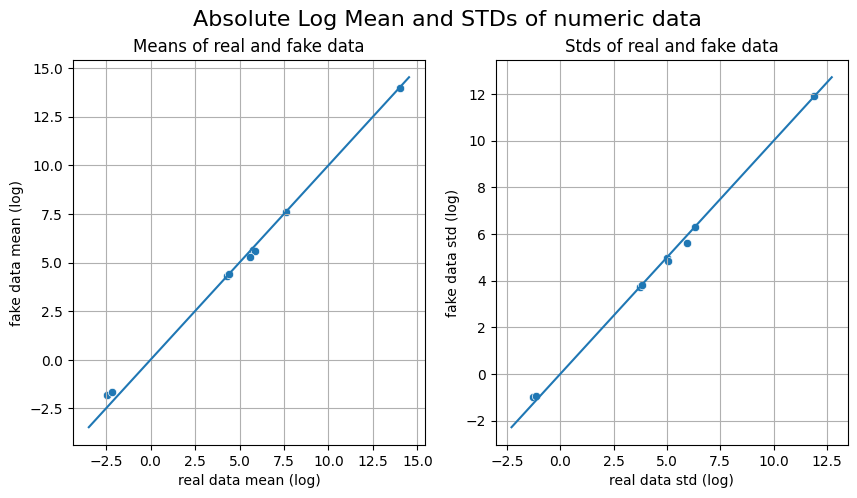

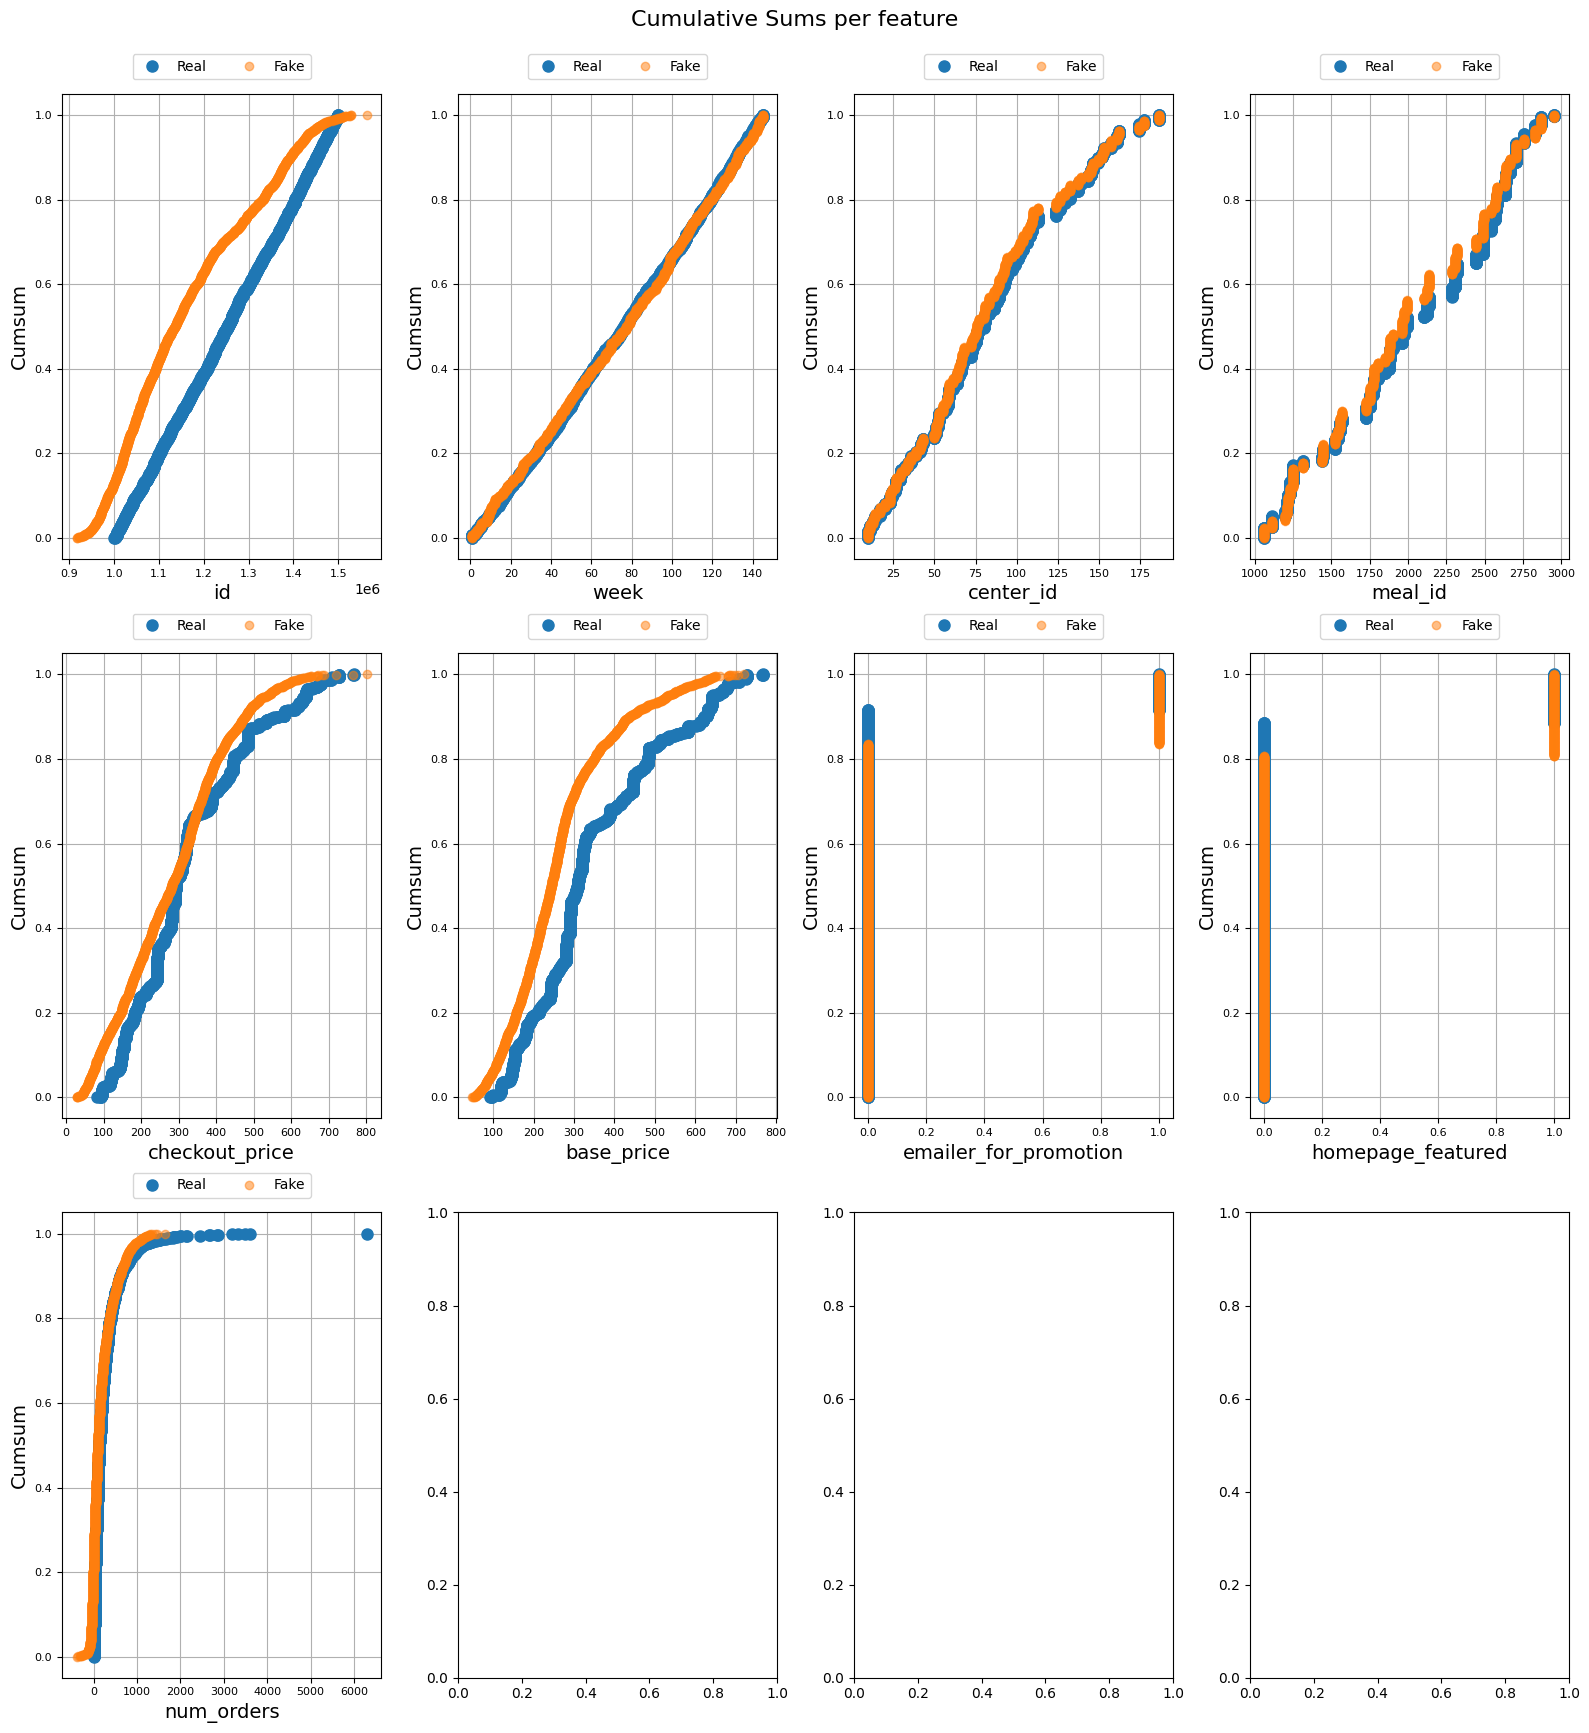

c:\Users\vivek.p.GROUPINFRA\Anaconda3\envs\synthetic_py3.8\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
c:\Users\vivek.p.GROUPINFRA\Anaconda3\envs\synthetic_py3.8\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
c:\Users\vivek.p.GROUPINFRA\Anaconda3\envs\synthetic_py3.8\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pa

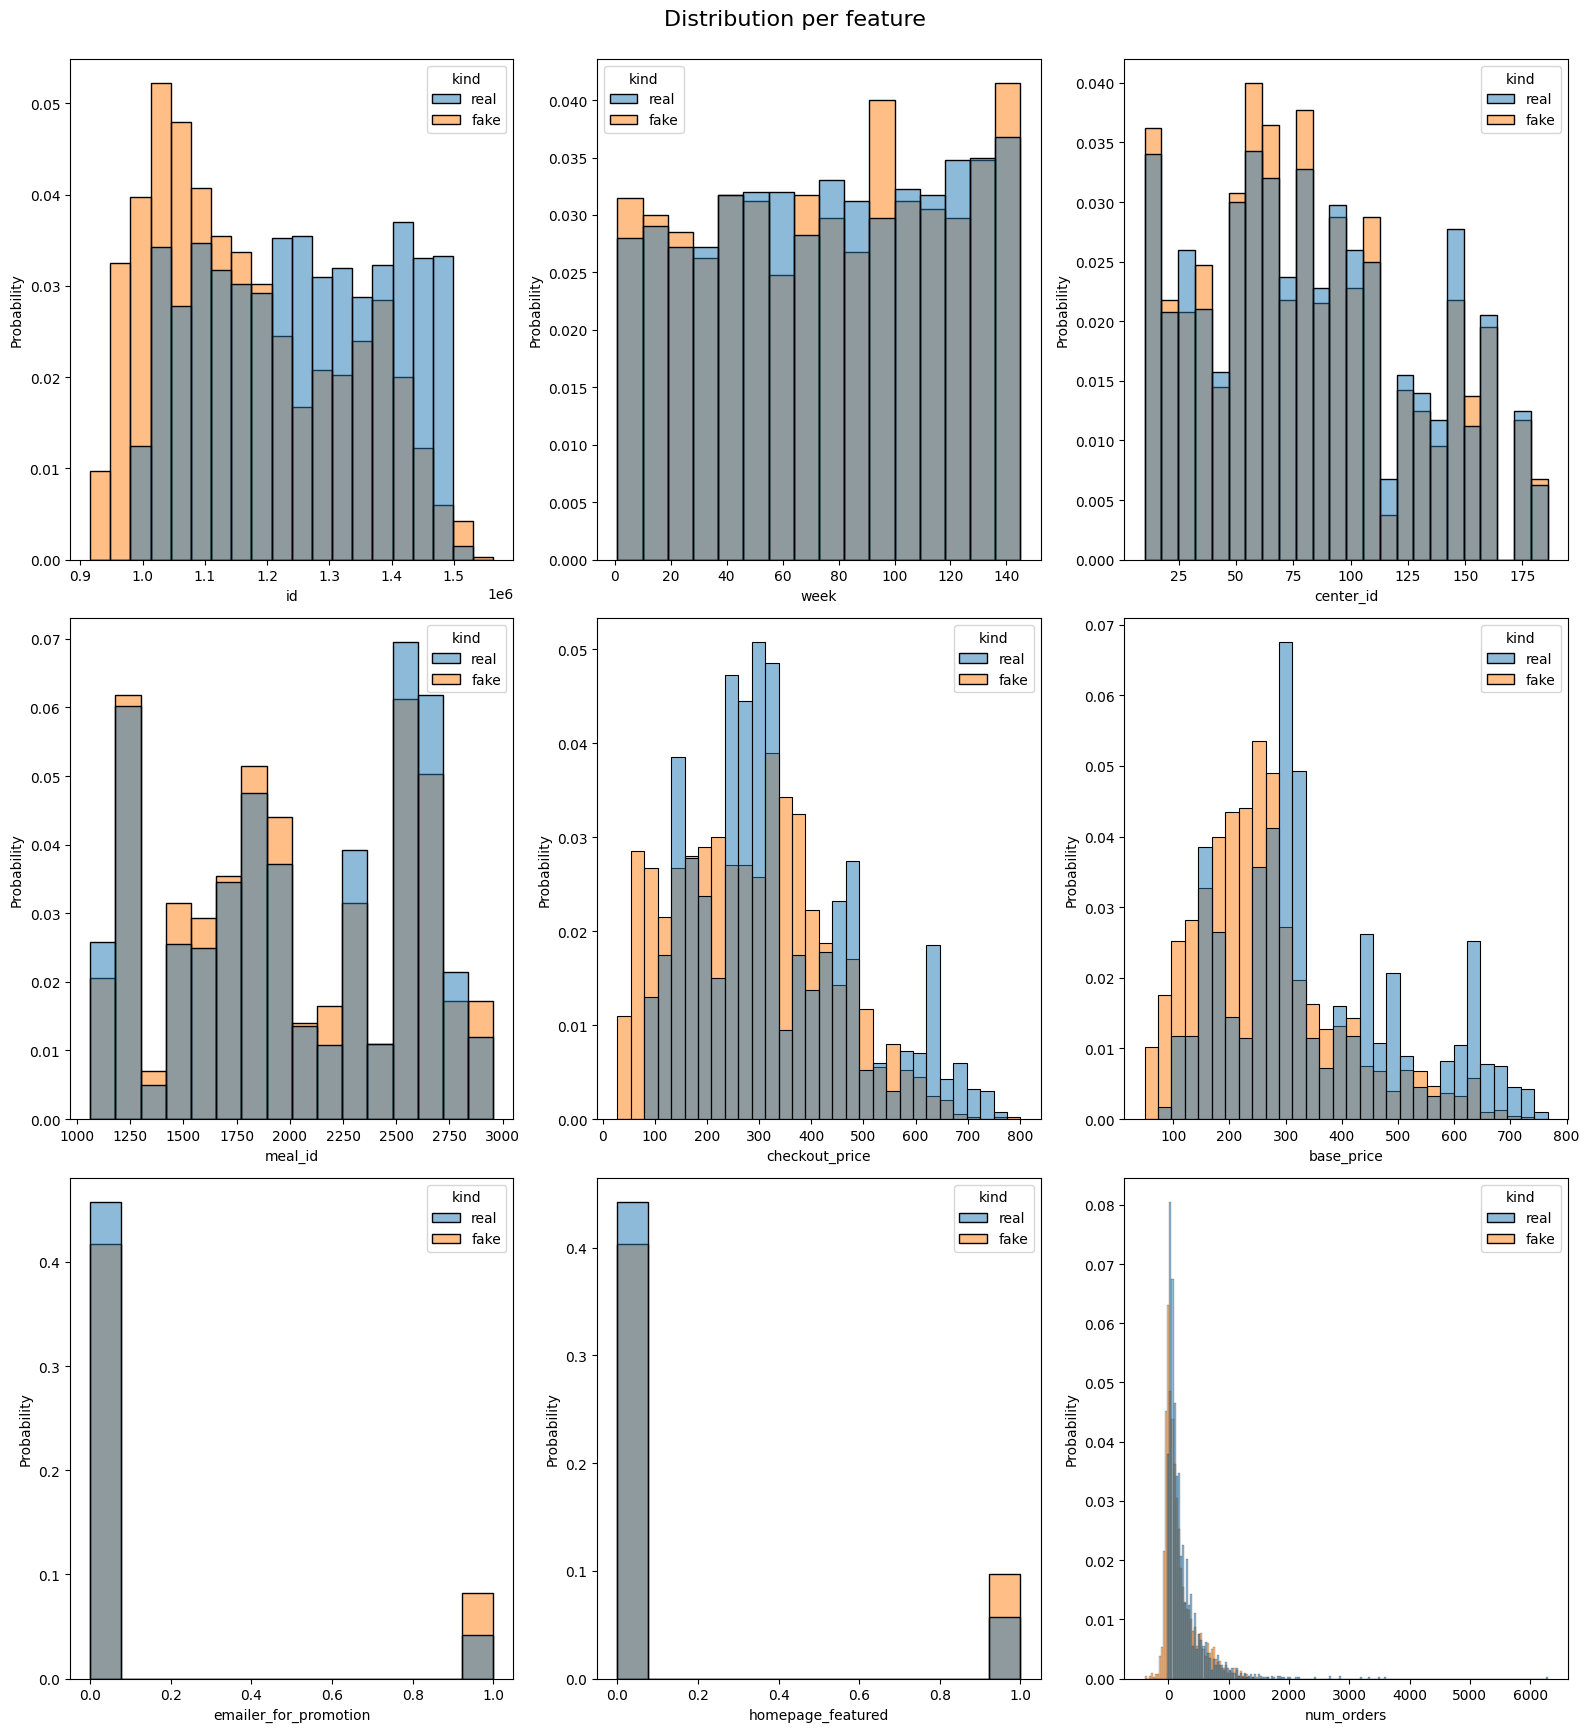

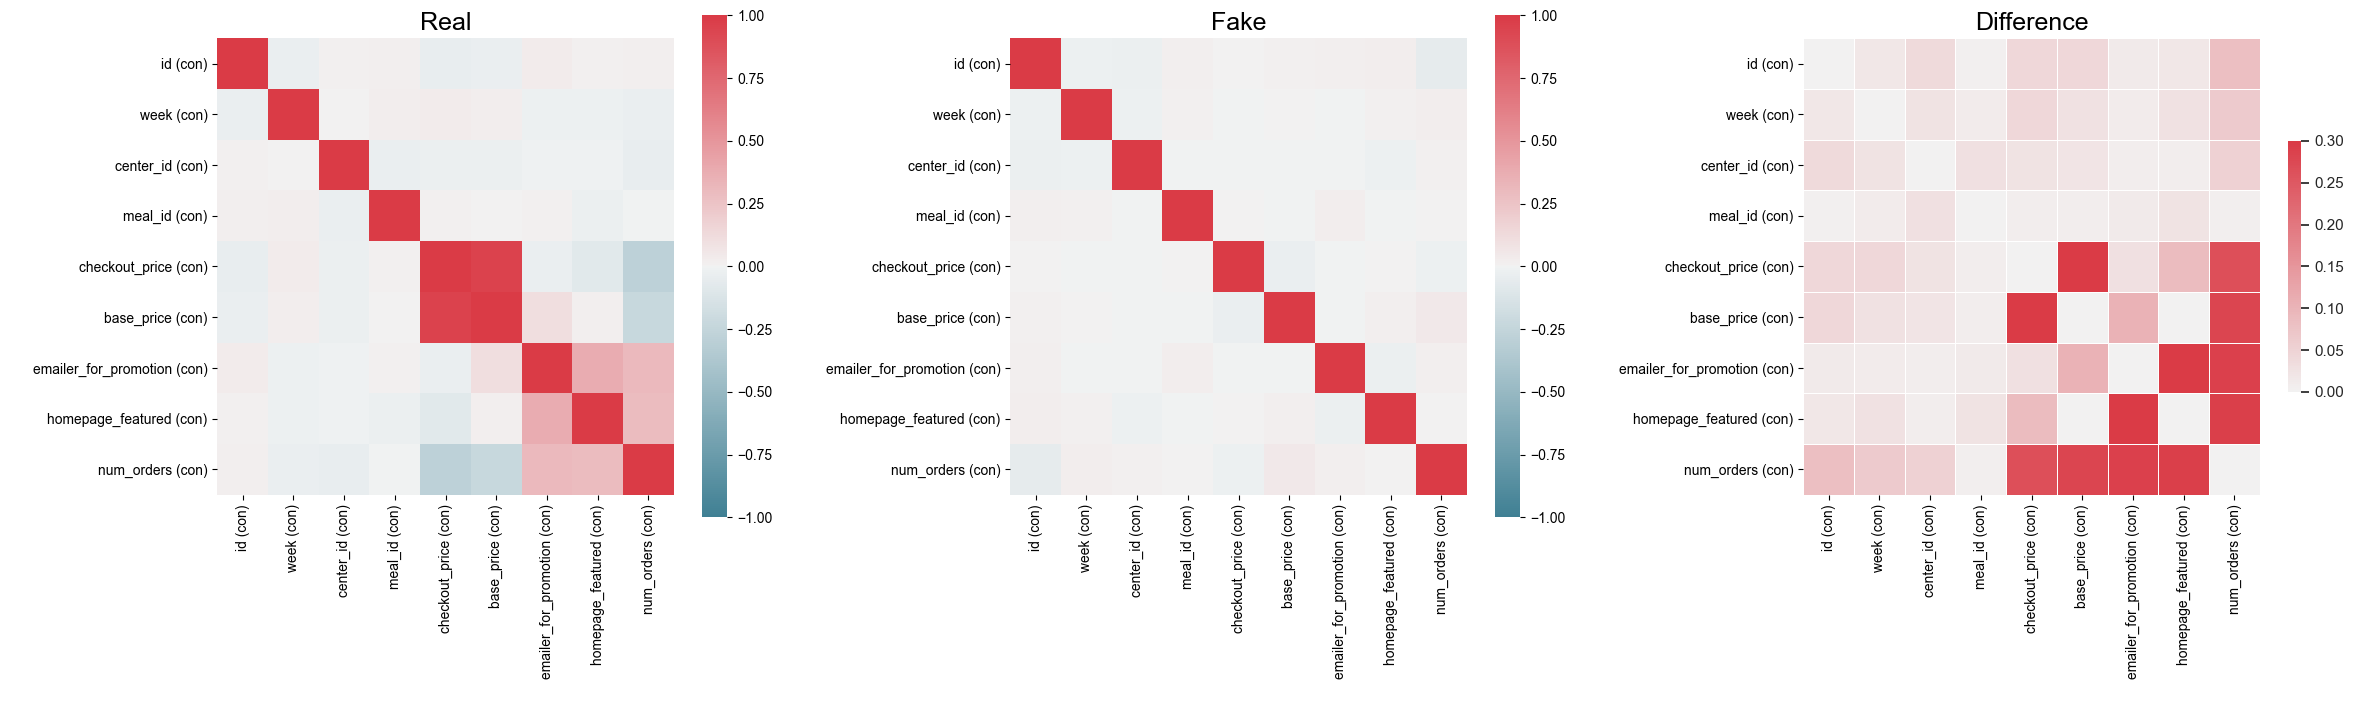

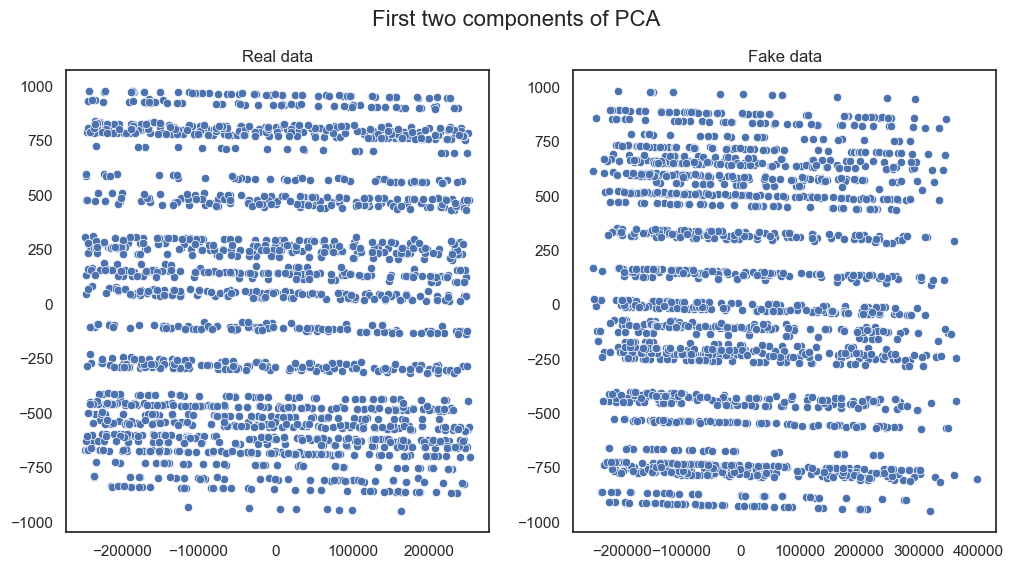

c:\Users\vivek.p.GROUPINFRA\Anaconda3\envs\synthetic_py3.8\lib\site-packages\table_evaluator\metrics.py:42: RuntimeWarning: invalid value encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true))



Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.0000   0.0000              0.0000
DecisionTreeClassifier_real   0.0100   0.0000              0.0000
LogisticRegression_fake       0.0025   0.0050              0.0000
LogisticRegression_real       0.0100   0.0025              0.0000
MLPClassifier_fake            0.0025   0.0025              0.0000
MLPClassifier_real            0.0075   0.0425              0.0000
RandomForestClassifier_fake   0.0000   0.0000              0.0025
RandomForestClassifier_real   0.0125   0.0000              0.0013

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    1.0671
nearest neighbor std                     0.4276

Miscellaneous results:
                                  Result
Column Cor

In [7]:
##Visualise
from table_evaluator import load_data, TableEvaluator
table_evaluator = TableEvaluator(data, samples)
table_evaluator.visual_evaluation()
table_evaluator.evaluate(target_col='num_orders')

In [8]:
## SDV model - Simple
from sdv.tabular import CTGAN

model = CTGAN(primary_key='id')
model.fit(data)
model.save("sdv-ctgan-food-demand.pkl")
new_data = model.sample(2000)
new_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,0,39,15,2543,291.5800,548.3300,0,0,148
1,1,62,122,1263,81.5400,173.8200,0,0,101
2,2,145,125,2664,526.7000,92.2100,0,0,18
3,3,47,89,1555,499.8500,715.7500,0,1,619
4,4,1,186,1171,480.2300,313.4300,1,0,567


In [12]:
# ## SDV model - Custom
# from sdv.tabular import CTGAN

# model = CTGAN(epochs=500,
#         batch_size=100,
#         generator_dim=(256, 256, 256),
#         discriminator_dim=(256, 256, 256))
# model.fit(data)
# model.save("sdv-ctgan-food-demand.pkl")
# new_data = model.sample(200)
# new_data.head()

In [9]:
##Evaluating
#This function displays aggregated results of all of the similarity metrics from 0 to 1, where 0 begins worst and 1 is ideal.
from sdv.evaluation import evaluate
evaluate(new_data, data)

0.699

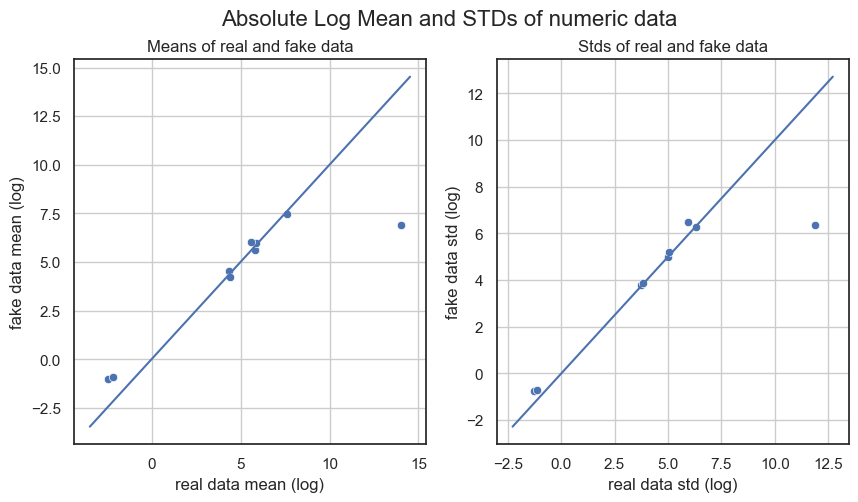

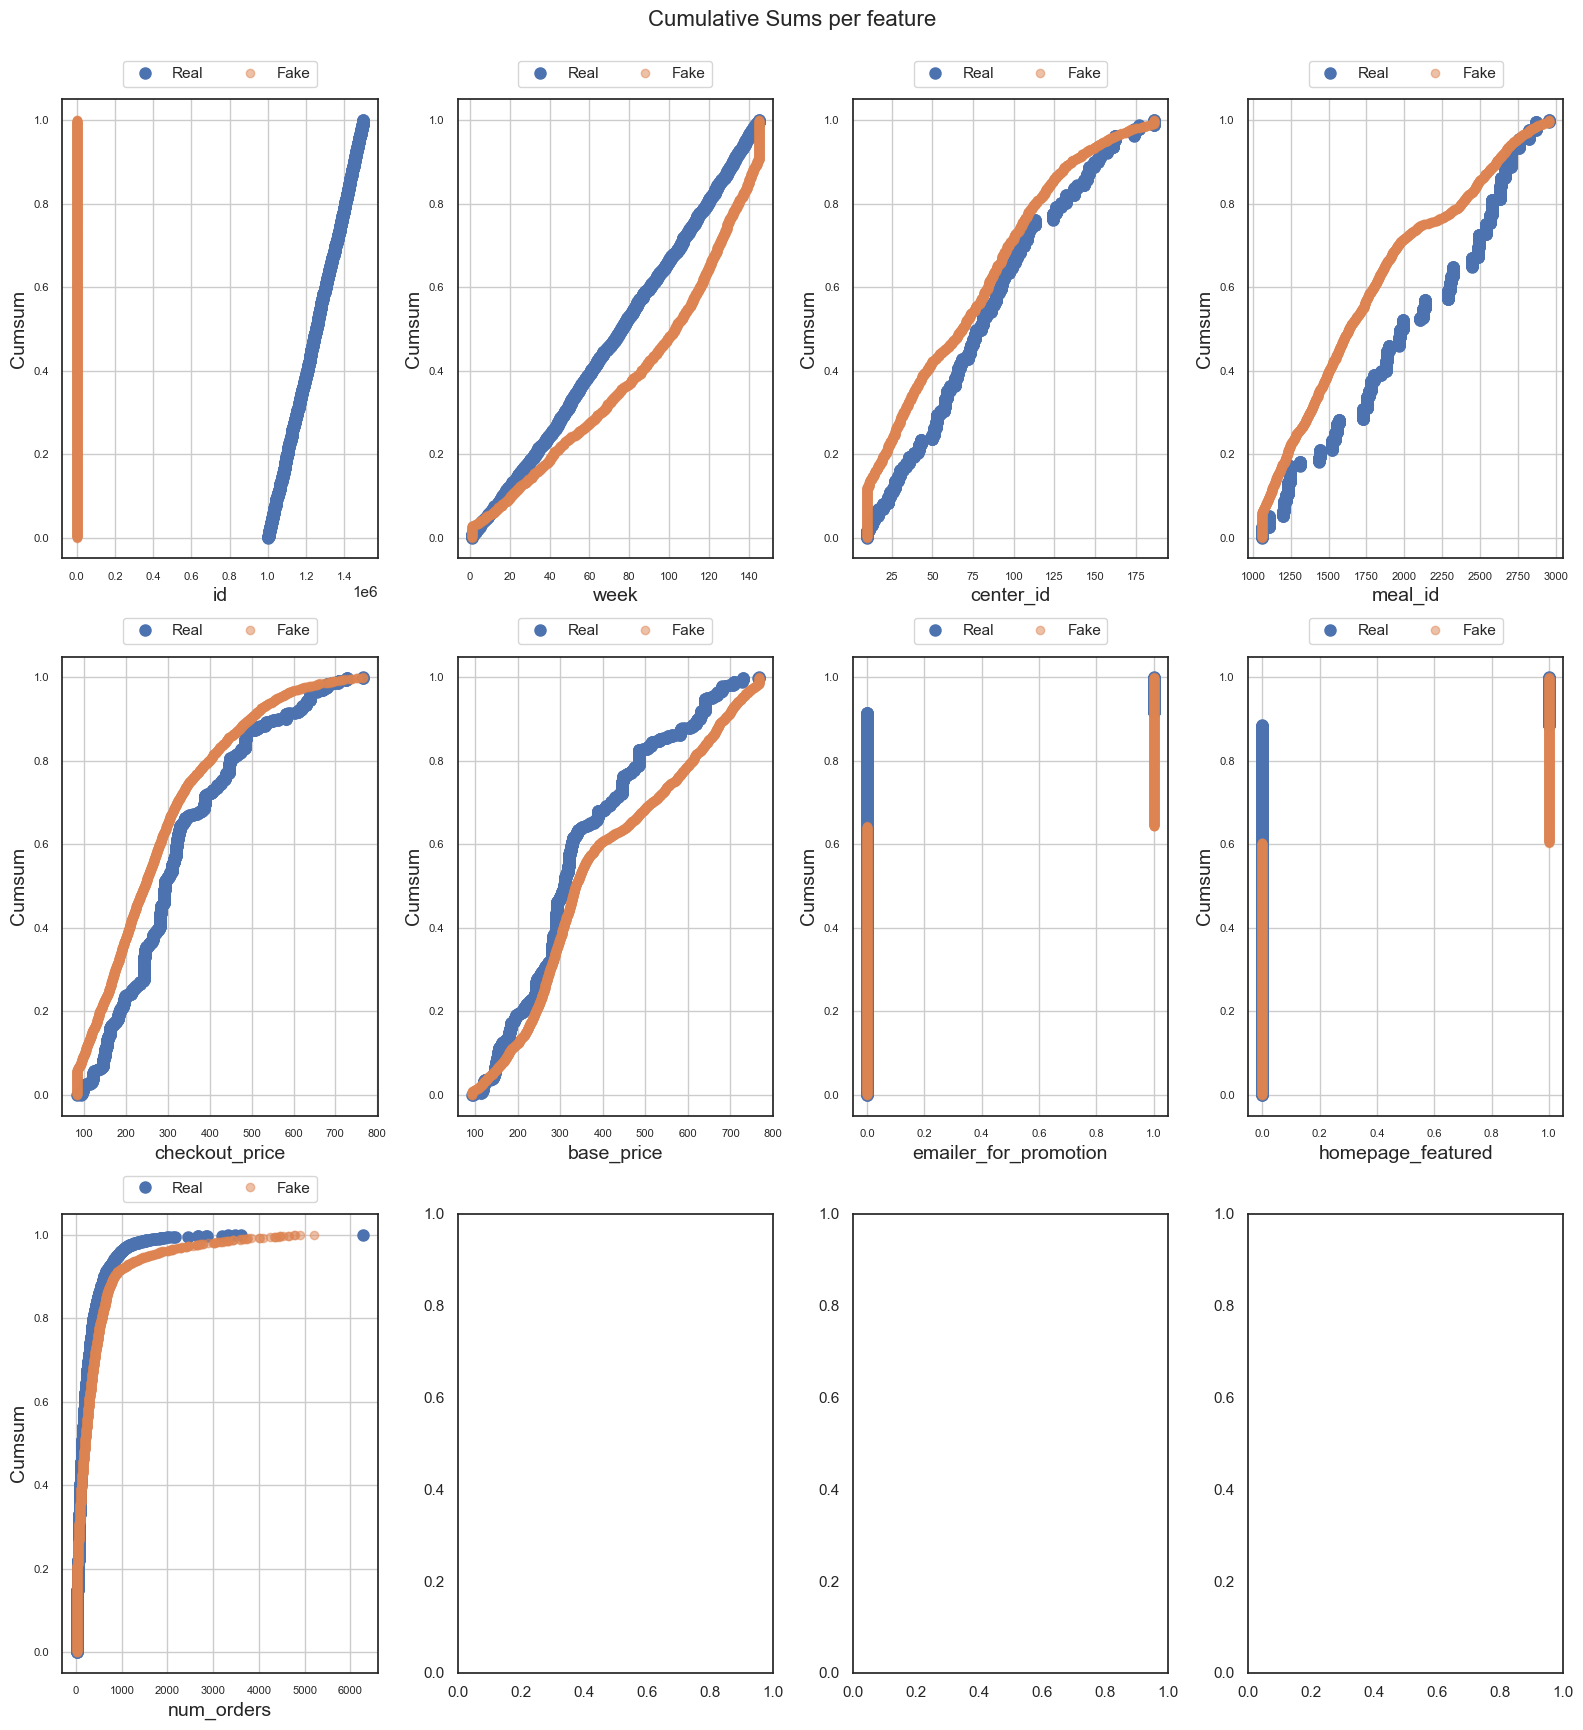

c:\Users\vivek.p.GROUPINFRA\Anaconda3\envs\synthetic_py3.8\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
c:\Users\vivek.p.GROUPINFRA\Anaconda3\envs\synthetic_py3.8\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
c:\Users\vivek.p.GROUPINFRA\Anaconda3\envs\synthetic_py3.8\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pa

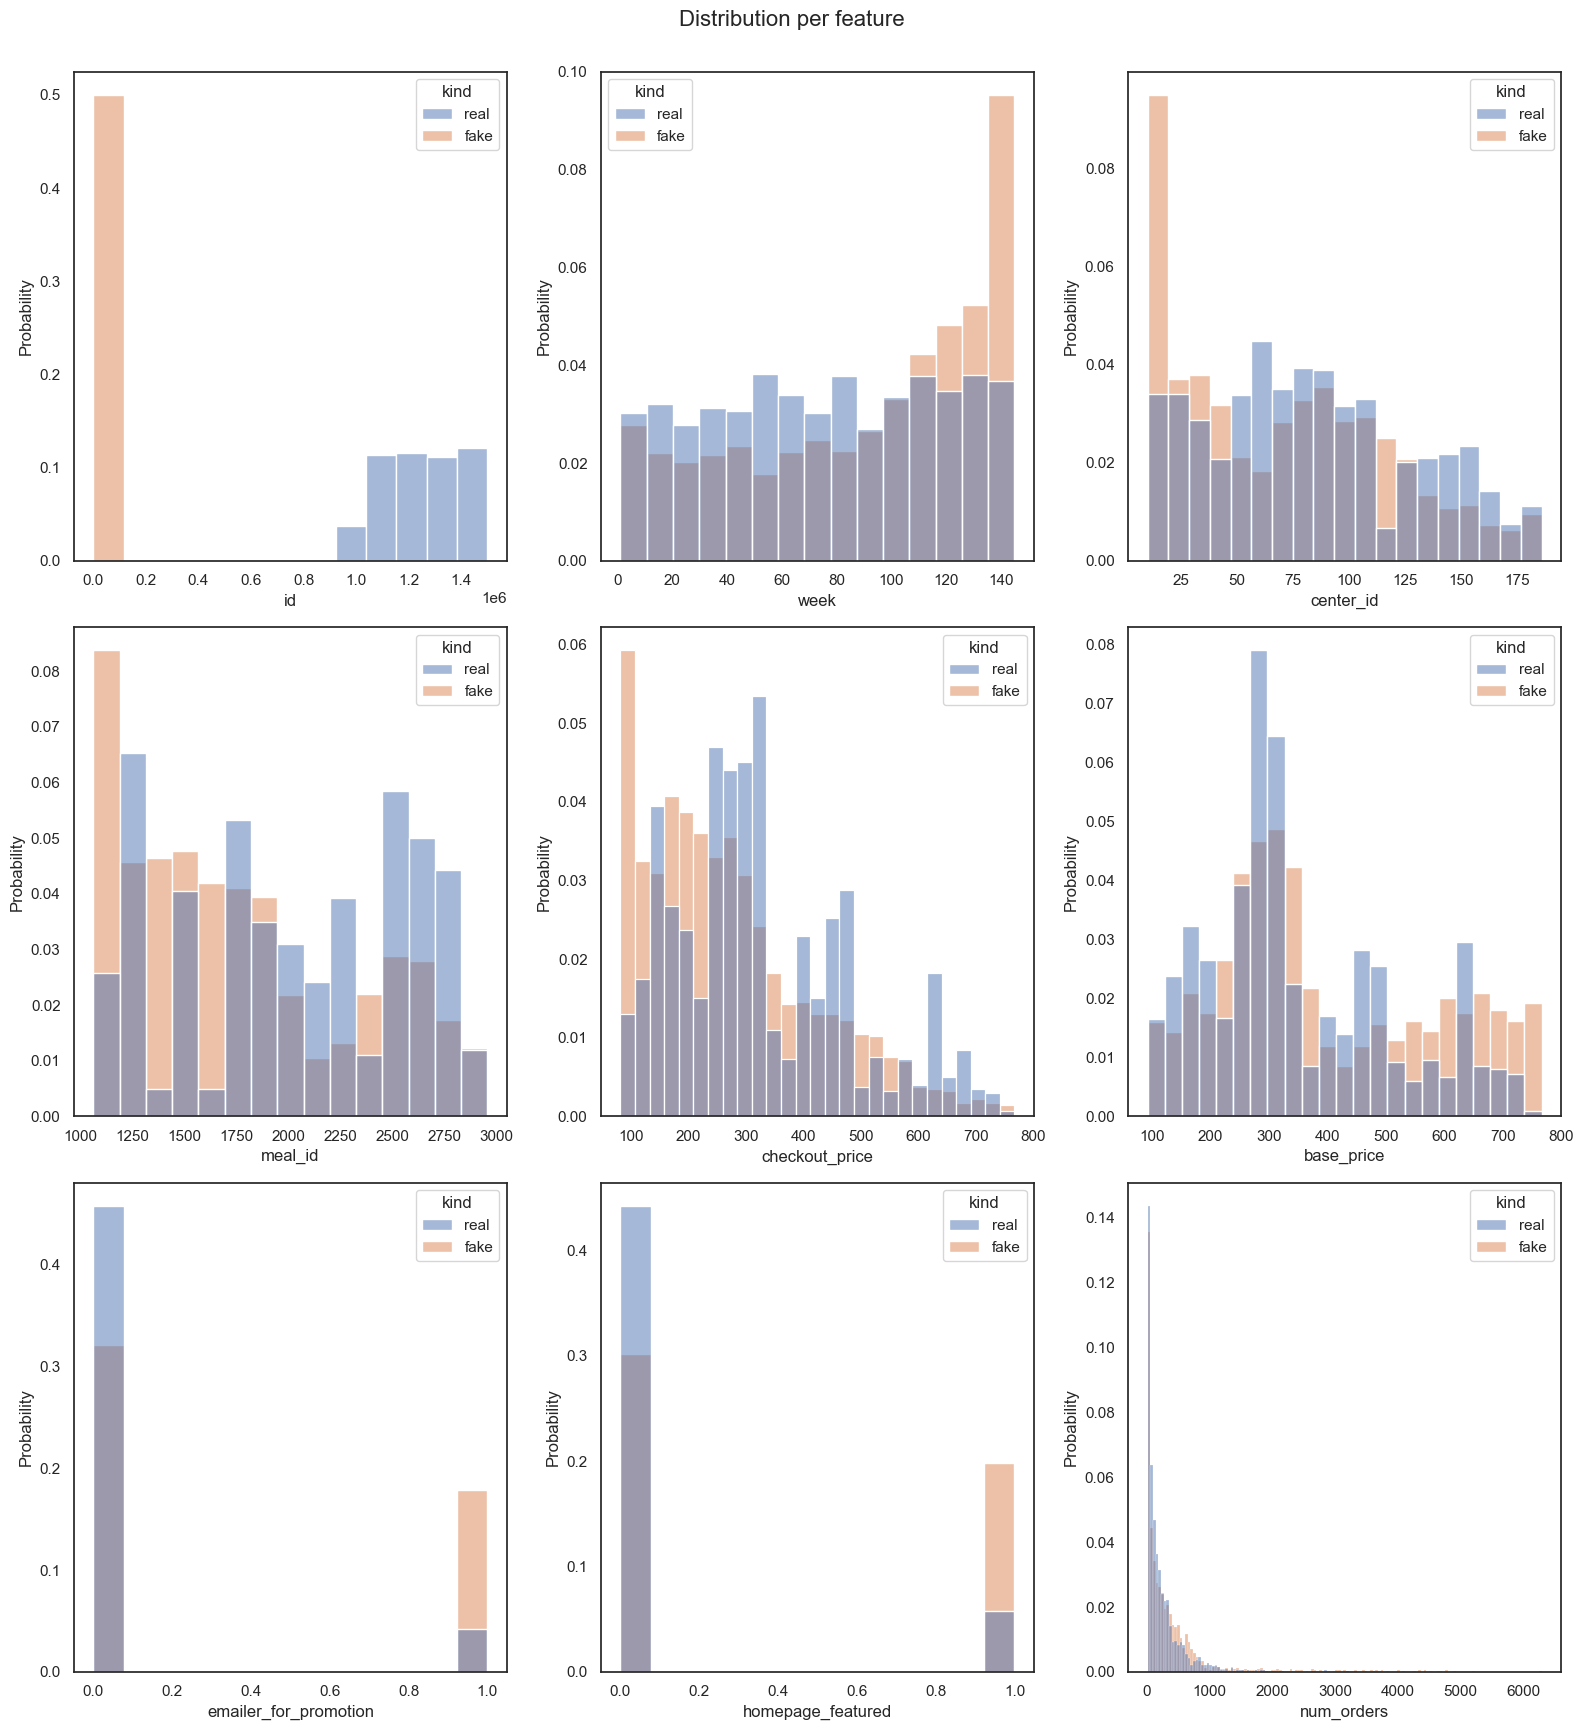

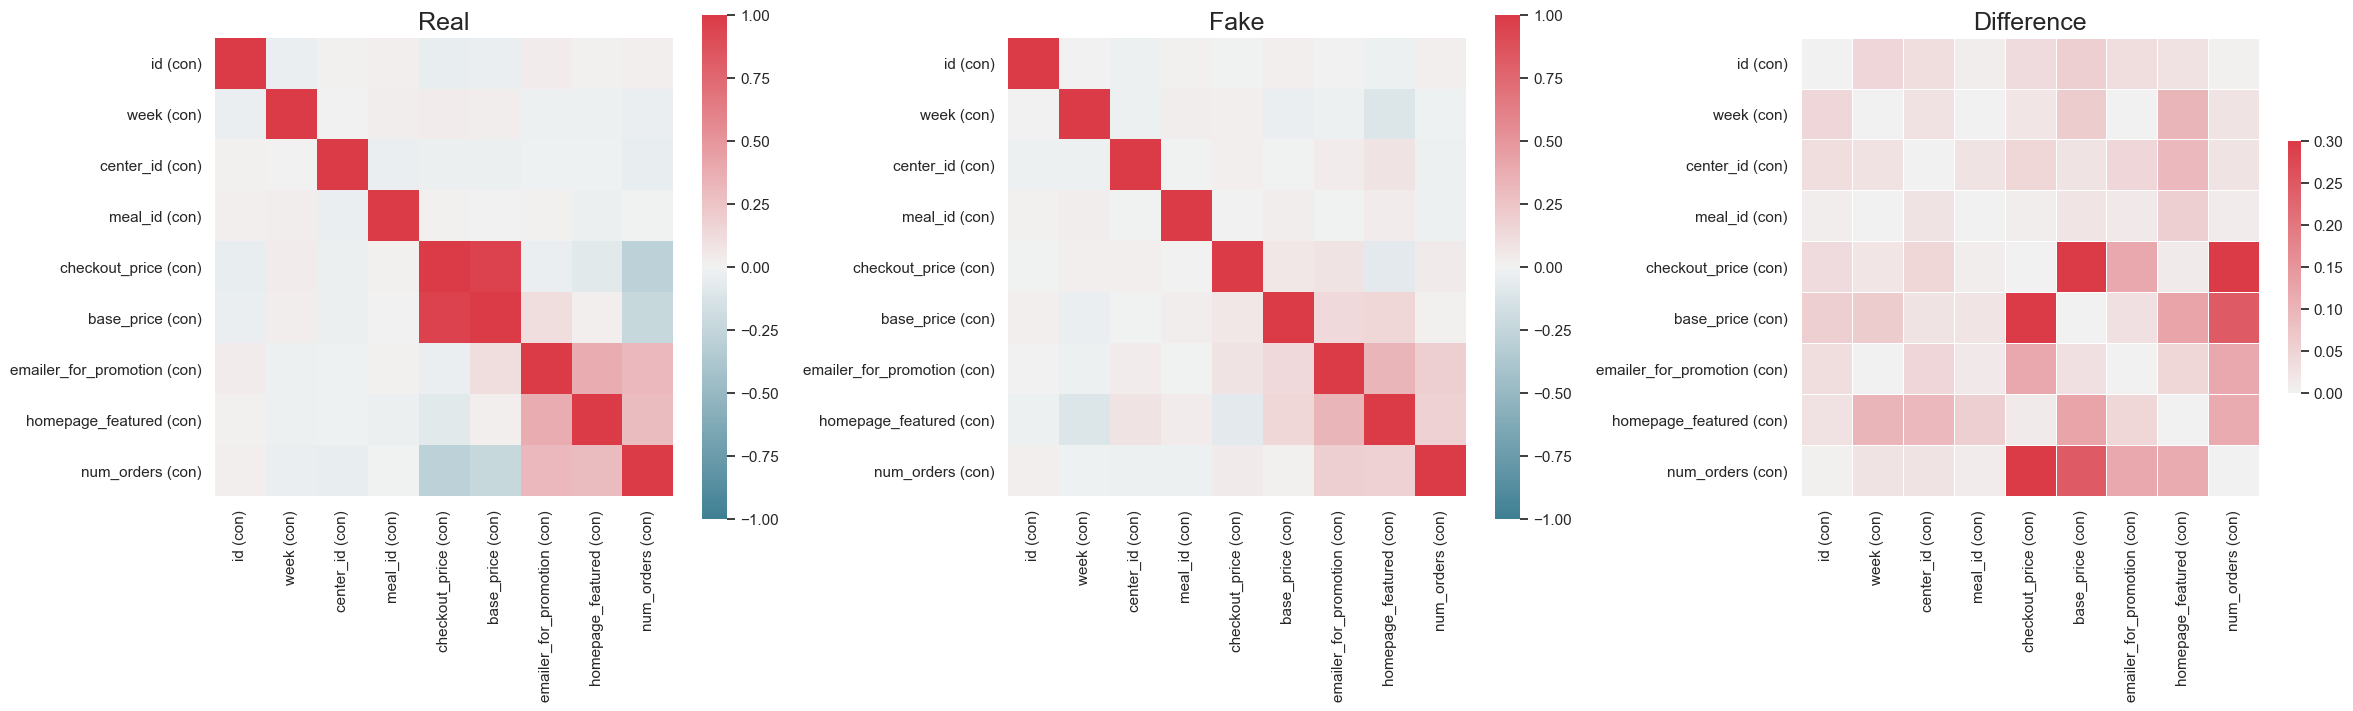

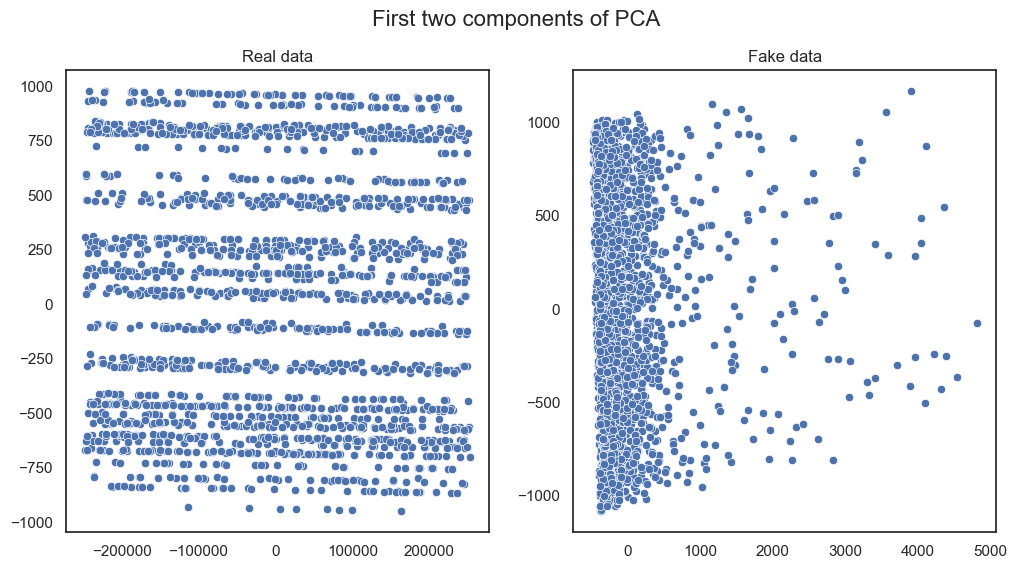

c:\Users\vivek.p.GROUPINFRA\Anaconda3\envs\synthetic_py3.8\lib\site-packages\table_evaluator\metrics.py:42: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true))



Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.0075   0.0450              0.0025
DecisionTreeClassifier_real   0.0100   0.0025              0.0025
LogisticRegression_fake       0.0000   0.1400              0.0000
LogisticRegression_real       0.0225   0.0000              0.0000
MLPClassifier_fake            0.0025   0.0825              0.0013
MLPClassifier_real            0.0050   0.0000              0.0000
RandomForestClassifier_fake   0.0075   0.1250              0.0050
RandomForestClassifier_real   0.0250   0.0125              0.0063

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    1.0673
nearest neighbor std                     0.3754

Miscellaneous results:
                                  Result
Column Cor

In [10]:
##Visualise
from table_evaluator import load_data, TableEvaluator
table_evaluator = TableEvaluator(data, new_data)
table_evaluator.visual_evaluation()
table_evaluator.evaluate(target_col='num_orders')